# Modelo SEIRS

* Susceptible -> Exposed -> Infected -> Recovered -> Susceptible
* ds/dt = mi - beta(t)*S*I - mi*S
* dE/dt = beta(t)*S*I - (mi+alpha)*E
* dI/dt = alpha*E - (mi+gamma)*I
* dR/dt = gamma*I - mi*R
* S(t) = S(0)*exp(-R0*(R(t)-R(0))/N)
* R0 = beta0*alpha/((mi+alpha)(mi+gamma))

In [99]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


### Indivíduos suscetíveis ao longo do tempo S(t)
* S(0) é a população inicial suscetível ao vírus.
No código: S0 = 1000000 (1 milhão de pessoas)
* N0 é o número de reprodução básico, ou seja, quantas pessoas serão infectadas a partir de cada indivíduo infeccioso.
* Neste modelo, o número de reprodução básico adotado foi R0 = 2.1
* mi é a taxa de mortalidade. Vamos considerar que a taxa de mortalidade é igual a taxa de natalidade neste modelo, mi = 0.0001422
* N é a constância da população, N = 2200000;
* período latente médio para a doença: alpha = 14 dias
* período infeccioso médio: gamma = 14 dias

In [100]:
def R(t):        
    mi = 0.0001422
    S0 = S0 = 1000000
    R = t*mi*S0
    return R
    
def S(t):
    S0 = 1000000
    R0 = 2.1
    N = N = 2200000
    S = S0*np.exp(R0*(R(t)-R(0))/N)
    return S
    
def beta(t):
    R0 = 2.1
    mi = 0.0001422
    alpha = 14
    gamma = 14
    beta = t*np.random.rand(1,1)*R0*(mi + alpha)*(mi + gamma)
    return beta   
   

### Condições iniciais
 
   * S0 = 1000000
   * mi = 0.0001422
   * R0 = 2.1
   * N = 2200000
   * gamma = 14
   * alpha = 14

In [107]:
state = [1000000,90,15,10]

### ODEs


In [108]:
def model(S,t):
    
    S0 = 1000000
    mi = 0.0001422
    R0 = 2.1
    N = 2200000
    gamma = 14
    alpha = 14
    
    S = 1000000
    E = 90
    I = 15
    R = 10
    
    dsdt = mi - beta(t)*S*I-mi*S
    dEdt = beta(t)*S*I-(mi+alpha)*E
    dIdt = alpha*E-(mi+gamma)*I
    dRdt = gamma*I- mi*R
    
    dzdt = [dsdt,dEdt,dIdt,dRdt]
    
    return dzdt    

### Quantidade de pontos no tempo

In [127]:
t = np.linspace(0,100,100)

### Resolvendo as ODEs

In [128]:
z = odeint(model,state,t)

In [129]:
t

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [134]:
t.shape

(100,)

In [147]:
z

array([[ 1.00000000e+006,  9.00000000e+001,  1.50000000e+001,
         1.00000000e+001],
       [ 9.99999998e+005,  9.00008880e+001,  1.50012724e+001,
         1.00002545e+001],
       [ 3.30390646e-086,  1.65915512e-076,  1.20010289e-071,
         5.93508947e-038],
       [ 2.63060288e-052,  8.54323630e-072,  4.76648730e-038,
         4.07969234e+223],
       [ 1.83289315e-076,  3.93897365e-062,  8.54323630e-072,
        -7.17367995e-311],
       [ 1.89975765e-052,  5.15247748e-062,  2.17597846e-076,
         2.09756552e-075],
       [ 5.88459698e-062,  5.05578714e-038,  1.89934502e-052,
         5.34850825e-038],
       [ 4.08024390e+223,  1.74518338e-076,  1.11005786e-047,
         8.54323630e-072],
       [ 1.39871803e-076,  8.61661860e-043,  9.50464334e-043,
         4.08673311e-033],
       [ 2.09756658e-075,  1.39804463e-076,  2.31779295e-052,
         6.37257436e-067],
       [ 9.17107726e-072,  1.32256367e+136,  4.42701986e-062,
         1.08646215e-071],
       [ 8.54323630e-

In [144]:
z[:,0].shape

(100,)

### Plot: população suscetível

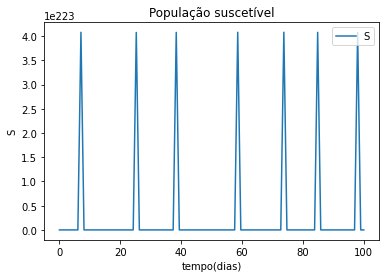

In [153]:
plt.plot(t,z[:,0], label = 'S')
plt.xlabel("tempo(dias)")
plt.ylabel("S")
plt.title("População suscetível")
plt.legend(loc='upper right')
plt.savefig("s.pdf")

### Plot: população exposta

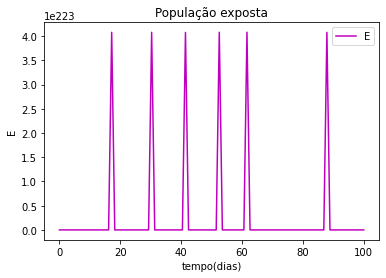

In [155]:
plt.plot(t,z[:,1], color='m', label = 'E')
plt.xlabel("tempo(dias)")
plt.ylabel("E")
plt.title("População exposta")
plt.legend(loc='upper right')
plt.savefig("e.pdf")

### Plot: população infecciosa

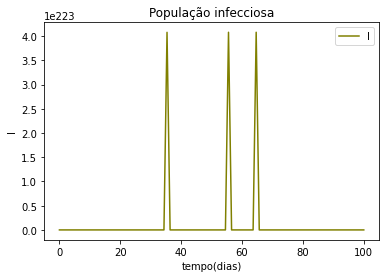

In [156]:
plt.plot(t,z[:,2], color='olive', label = 'I')
plt.xlabel("tempo(dias)")
plt.ylabel("I")
plt.title("População infecciosa")
plt.legend(loc='upper right')
plt.savefig("i.pdf")

### Plot: população removida ou recuperada

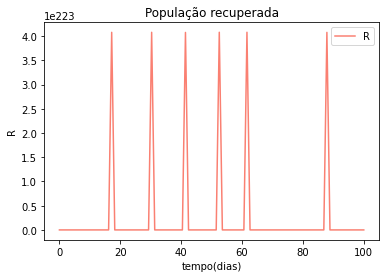

In [158]:
plt.plot(t,z[:,1], color='salmon', label = 'R')
plt.xlabel("tempo(dias)")
plt.ylabel("R")
plt.title("População recuperada")
plt.legend(loc='upper right')
plt.savefig("r.pdf")